In [1]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

wl = np.linspace(380, 780, 401)[2:]
air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')
ITO2_Cauchy = ml.Cauchy([1.3914142, 0.0903928], ITO2.k, ITO2.wl_k)
ITO2_Linear = ml.Chromatic_Dispersion(1.786, -1.153, 550, ITO2.k, ITO2.wl_k)

R_scan = pd.read_csv('./spectrum/Nanya/Bonsai_R_5_B.csv')['SCAN'].values[2:]

R_hypo = lambda th: tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 5)

R_hypo_C = lambda th: tm.Design(
    [air, SiO2, ITO2_Cauchy, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 5)

R_hypo_L = lambda th: tm.Design(
    [air, SiO2, ITO2_Linear, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 5)

fom = lambda th:sum(abs(R_hypo(th)+th[4]-R_scan/100))

In [2]:
SiO2_1 = pd.read_csv('./spectrum/TEO/SiO2_1.csv')
SiO21n = SiO2_1['n'].values
SiO21k = SiO2_1['k'].values

NB_1 = pd.read_csv('./spectrum/TEO/NB_1.csv')
NB1n = NB_1['n'].values
NB1k = NB_1['k'].values

ITO = pd.read_csv('./spectrum/TEO/ITO.csv')
ITOn = ITO['n2'].values
ITOk = ITO['k2'].values
w = ITO['nm'].values

SiO2_TEO = ml.Material(w, SiO21n, SiO21k, w)
NB_TEO = ml.Material(w, NB1n, NB1k, w)
ITO_TEO = ml.Material(w, ITOn, ITOk, w)

R_hypo_TEO = lambda th: tm.Design(
    [air, SiO2_TEO, ITO_TEO, SiO2_TEO, NB_TEO, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 5)
fom_TEO = lambda th: tm.RMSE(100*R_hypo_TEO(th), R_scan)

In [3]:
sol = differential_evolution(
    fom_TEO, [
        (68,100),(20,32),(38,55),(0,12)
    ], disp=True, polish=False, popsize=20, mutation=0.3, recombination =0.9,strategy = 'best1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 0.120083
differential_evolution step 2: f(x)= 0.109754
differential_evolution step 3: f(x)= 0.0844386
differential_evolution step 4: f(x)= 0.0820542
differential_evolution step 5: f(x)= 0.0797098
differential_evolution step 6: f(x)= 0.0786947
differential_evolution step 7: f(x)= 0.078677
differential_evolution step 8: f(x)= 0.0786734
differential_evolution step 9: f(x)= 0.0786705
[90.61299751 22.36935037 50.95158352  4.43803403]


In [ ]:
sol2 = minimize(fom, sol.x)
print(sol2.x)

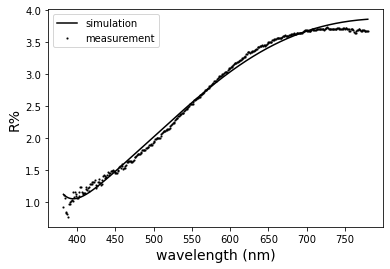

0.07867048617523006


In [9]:
m = [90.99943234,21.1894083,52.67896928,4.3345816]
m2 = [90.61299751,22.36935037,50.95158352,4.43803403]
tk = m2
#plt.plot(wl, 100*R_hypo(tk), '--k', label = 'simulation')
#plt.plot(wl, 100*R_hypo_C(tk), '--b', label = 'simulation')
#plt.plot(wl, 100*R_hypo_L(tk), '--g', label = 'simulation')
plt.plot(wl, 100*R_hypo_TEO(tk), '-k', label = 'simulation')
plt.plot(wl, R_scan, 'ks', label = 'measurement', markersize = 1)
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
#plt.savefig('Nanya_Bonsai_reflection_blacktap_TEO.png')
#print((sum((100*R_hypo(tk)-R_scan)**2)**.5)/301/np.mean(R_scan))
plt.show()
print(tm.RMSE(100*R_hypo_TEO(tk), R_scan))
#print(np.mean(abs(100*R_hypo(tk)-100*R_hypo_C(tk))))
#print(np.mean(abs(100*R_hypo(tk)-100*R_hypo_L(tk))))

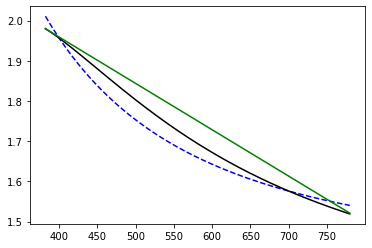

In [17]:
plt.plot(wl, ITO2_Cauchy.nvalues(wl), '--b')
plt.plot(wl, ITO2.nvalues(wl), '-k')
plt.plot(wl, ITO2_Linear.nvalues(wl), '-g')
plt.show()